Exploratory data analysis (EDA) is a crucial component of data science which allows you to understand the basics of what your data looks like and what kinds of questions might be answered. For this task, we are going to clean, sanitise and explore our data. Using the movies dataset, complete the steps outlined in this notebook by writing code in the cells.

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json
import missingno

import warnings
warnings.filterwarnings("ignore")

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#### Load the movies dataset 
automobile_df = pd.read_csv('automobile.txt')
automobile_df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

### Data Cleansing
#### Clean the data


In [3]:
# check what kind of data we have
automobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [4]:
# Code here
# Remove all columns between column name 'status' to 'tagline'
# automobile_df.drop(automobile_df.loc[:, 'aspiration':'drive-wheels'].columns, axis=1, inplace = True)
# automobile_df.drop(automobile_df.loc[:, 'fuel-system':'stroke'].columns, axis=1, inplace = True)
# automobile_df.drop(['engine-type'], axis=1, inplace = True)
# automobile_df.drop(['engine-location'], axis=1, inplace = True)
# automobile_df.drop(['symboling'], axis=1, inplace = True)
# automobile_df.head()

#### Remove any duplicate rows

In [5]:
# Code here
# Select duplicate rows of all columns
df_duplicates = automobile_df[automobile_df.duplicated()]
print(df_duplicates)

# remove duplicate rows based on all columns
automobile_df.drop_duplicates(inplace=True)


Empty DataFrame
Columns: [symboling, normalized-losses, make, fuel-type, aspiration, num-of-doors, body-style, drive-wheels, engine-location, wheel-base, length, width, height, curb-weight, engine-type, num-of-cylinders, engine-size, fuel-system, bore, stroke, compression-ratio, horsepower, peak-rpm, city-mpg, highway-mpg, price]
Index: []

[0 rows x 26 columns]


#### Remove rows with missing data 

Some movies in the database have zero budget or zero revenue which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [6]:
# Code here
# replace all the missing values with nan and then drop them
automobile_df.replace('?', np.nan, inplace=True)
automobile_df = automobile_df.dropna()
# check if there are any more missing values
automobile_df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

# Change data types
There are columns that are objects and they must be changed to integers and float in order to be able to analyse them.

In [37]:
# automobile_df['price'] = automobile_df['price'].astype('int64')
automobile_df[["bore", "stroke"]] = automobile_df[["bore", "stroke"]].astype("float")
automobile_df[["normalized-losses"]] = automobile_df[["normalized-losses"]].astype("int")
automobile_df[["price"]] = automobile_df[["price"]].astype("float")
automobile_df[["peak-rpm"]] = automobile_df[["peak-rpm"]].astype("float")
automobile_df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

# Data Wrangling


In [8]:
# Make sure that the czr makes have unique names
print(automobile_df.make.unique())
print(automobile_df.make.nunique())

['audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'jaguar' 'mazda' 'mercedes-benz'
 'mitsubishi' 'nissan' 'peugot' 'plymouth' 'porsche' 'saab' 'subaru'
 'toyota' 'volkswagen' 'volvo']
18


### Now onto the exploration

#### Identify relationships between variables (features)

The main goal here is to identify and create relationships that can help you formulate ideas. We have defined questions to help you identify some relationships to explore.

# Statistics Summary

In [10]:
automobile_df.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,159.0,0.735849,1.193086,-2.0,0.00,1.0,2.0,3.0
wheel-base,159.0,98.264151,5.167416,86.6,94.50,96.9,100.8,115.6
length,159.0,172.413836,11.523177,141.1,165.65,172.4,177.8,202.6
width,159.0,65.607547,1.947883,60.3,64.00,65.4,66.5,71.7
height,159.0,53.899371,2.268761,49.4,52.25,54.1,55.5,59.8
curb-weight,159.0,2461.138365,481.941321,1488.0,2065.50,2340.0,2809.5,4066.0
engine-size,159.0,119.226415,30.460791,61.0,97.00,110.0,135.0,258.0
compression-ratio,159.0,10.161132,3.889475,7.0,8.70,9.0,9.4,23.0
city-mpg,159.0,26.522013,6.097142,15.0,23.00,26.0,31.0,49.0
highway-mpg,159.0,32.081761,6.459189,18.0,28.00,32.0,37.0,54.0


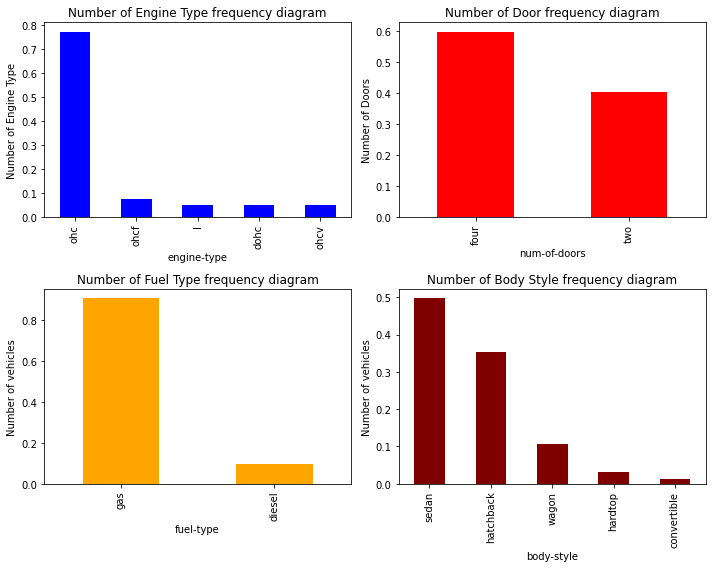

In [41]:
plt.figure(1)
plt.subplot(221)
automobile_df['engine-type'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='blue')
plt.title("Number of Engine Type frequency diagram")
plt.ylabel('Number of Engine Type')
plt.xlabel('engine-type');


plt.subplot(222)
automobile_df['num-of-doors'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='red')
plt.title("Number of Door frequency diagram")
plt.ylabel('Number of Doors')
plt.xlabel('num-of-doors');

plt.subplot(223)
automobile_df['fuel-type'].value_counts(normalize= True).plot(figsize=(10,8),kind='bar',color='orange')
plt.title("Number of Fuel Type frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('fuel-type');

plt.subplot(224)
automobile_df['body-style'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='maroon')
plt.title("Number of Body Style frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('body-style');
plt.tight_layout()
plt.show()

# Findings

    Graph 1: More than 70 % of the vehicle has Ohc type of Engine
    Graph 2: 57% of the cars have 4 doors and 43% have 2 doors
    Graph 3: Gas is preferred by 85 % of the vehicles
    Graph 4: Most produced vehicle are of body style sedan around 48%     followed by hatchback 32%


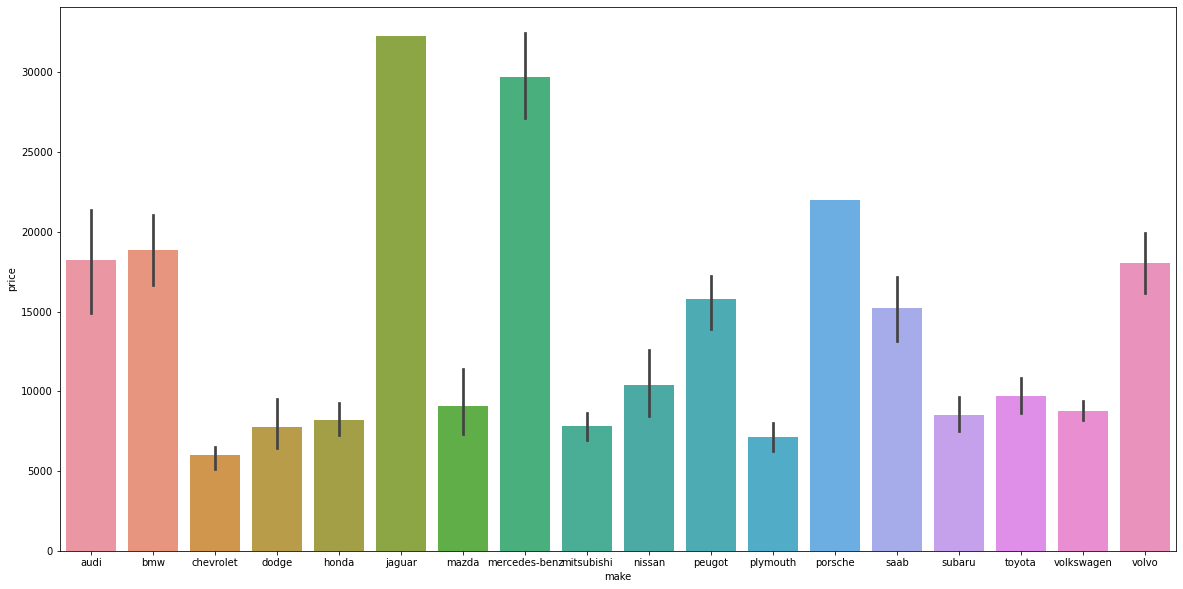

In [42]:
plt.rcParams['figure.figsize']=(20,10)
ax = sns.barplot(x="make", y="price", data=automobile_df)

# Findings

    Mercedez-Benz, Jaguar, Porshe produce the most expensive cars more than 20000 USD.
    cheverolet,dodge, honda, Mitsubishi, nissan, plymouth subaru, toyota produces budget models with lower prices
    most of the car companies produces cars below 20000
    
    



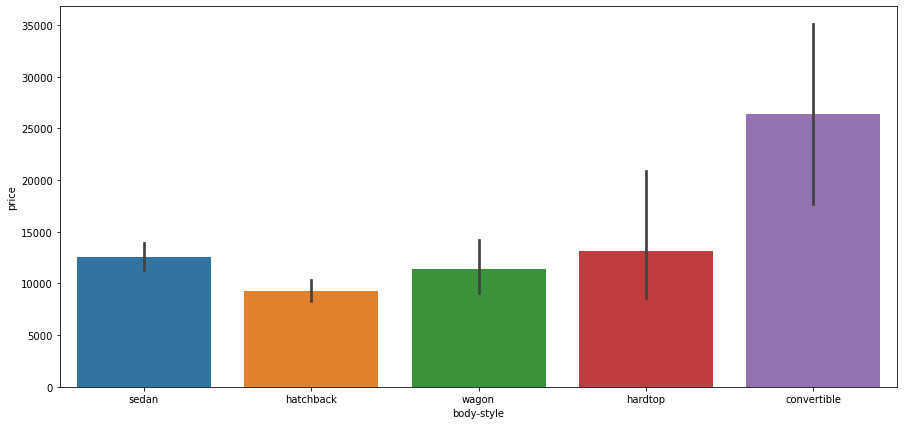

In [43]:
plt.rcParams['figure.figsize']=(15,7)
ax = sns.barplot(x="body-style", y="price", data=automobile_df)

# Findings
    Convertible car models are the most expensive in prices, followed by sedan and hardtop.

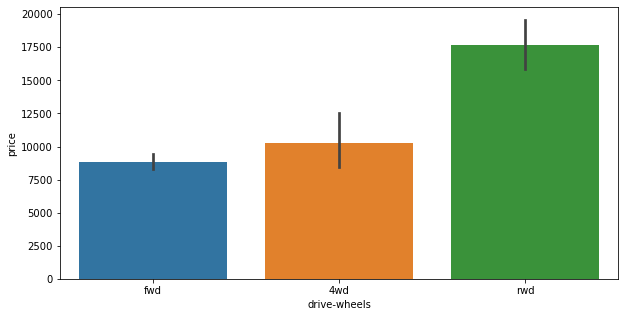

In [39]:
plt.rcParams['figure.figsize']=(10,5)
ax = sns.barplot(x="drive-wheels", y="price", data=automobile_df)

rwd wheel drive vehicle have expensive prices

<AxesSubplot:xlabel='fuel-type', ylabel='count'>

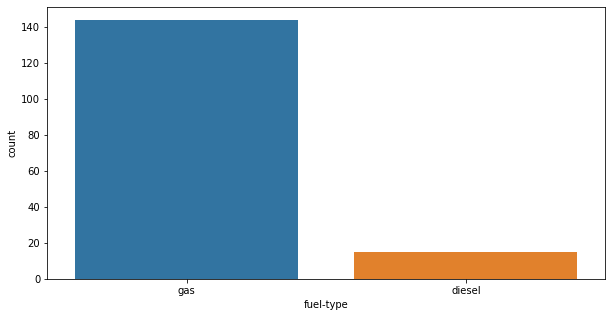

In [26]:

sns.countplot(x='fuel-type', data=automobile_df,order = automobile_df['fuel-type'].value_counts().index)

Most produced cars use gasoline.